<a href="https://colab.research.google.com/github/Woobin-Seo/Python/blob/master/random_forest/random_forest_regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# 必要なライブラリのインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pandas import DataFrame
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [0]:
# データの読み込み
boston = load_boston()
df = DataFrame(boston.data, columns = boston.feature_names)
df['MEDV'] = np.array(boston.target)

In [0]:
# 説明変数及び目的変数
X = df.iloc[:, :-1].values
y = df.loc[:, 'MEDV'].values

In [0]:
# 学習用、検証用データに分割
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.3, random_state=0)

In [5]:
#モデル構築
forest = RandomForestRegressor()
forest.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [0]:
#予測値を計算
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

In [0]:
#MSEの計算
from sklearn.metrics import mean_squared_error

In [8]:
print('MSE train : %.3f, test : %.3f' % (mean_squared_error(y_train, y_train_pred), 
                                         mean_squared_error(y_test, y_test_pred)))

MSE train : 1.779, test : 13.531


In [0]:
#R^2の計算
from sklearn.metrics import r2_score

In [10]:
print('MSE train : %.3f, test : %.3f' % (r2_score(y_train, y_train_pred), 
                                         r2_score(y_test, y_test_pred)))

MSE train : 0.979, test : 0.838


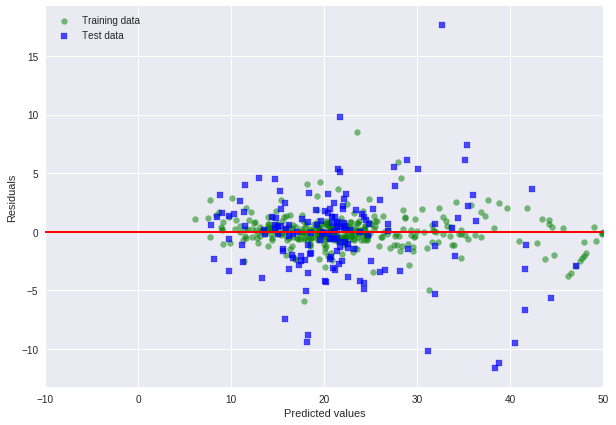

In [11]:
#残差プロット
# matplotlib inline
plt.figure(figsize = (10, 7))
plt.scatter(y_train_pred, y_train_pred - y_train, c='green', marker='o',
           s=35, alpha=0.5, label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='blue', marker='s',
           s=35, alpha=0.7, label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])
plt.show()